# Gaussian mixture model example
The code here visualizes the result from the `gmm_example.cpp` code.

- \# of particles = 20
- \# of iterations = 1000
- Kernel function = RBF with median scale method
- Optimizer = Adam with learning rate=0.1, $\beta_1$=0.9, $\beta_2$=0.999, and $\epsilon$=1e-8

The example GMM is a sum of two multivariate normal densities with mean and covariance matrices of (hardcoded in `gmm_example.cpp`):
$$
\mu_1 = \begin{bmatrix} 3.6871 \\ -2.8010 \end{bmatrix},\, \Sigma_1 = 5 \begin{bmatrix} 0.5001 & 0.2426 \\ 0.2426 & 0.8420 \end{bmatrix} = \begin{bmatrix} 2.5005 & 1.2130 \\ 1.2130 & 4.2100 \end{bmatrix} \\[5pt]
\mu_2 = \begin{bmatrix} -2.9802 \\ 4.3387 \end{bmatrix},\, \Sigma_2 = 5 \begin{bmatrix} 0.6779 & -0.1652 \\ -0.1652 & 0.2260 \end{bmatrix} = \begin{bmatrix} 3.3895 & -0.8260 \\ -0.8260 & 1.1300 \end{bmatrix} \\
$$
which looks like the following:

In [1]:
import subprocess
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats
import plotly.io as pio
pio.renderers.default = "jupyterlab+png"

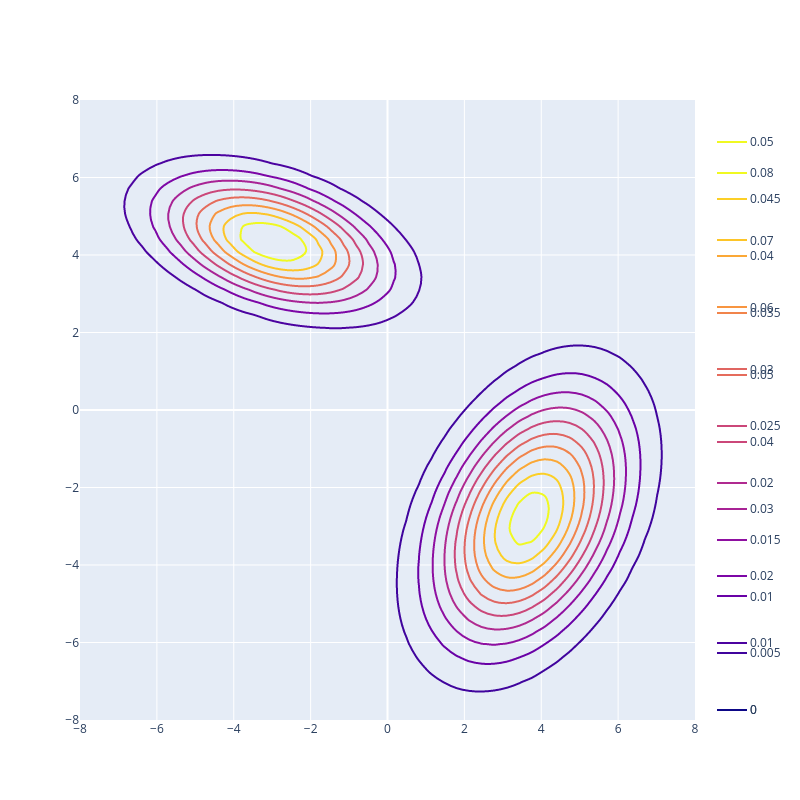

In [2]:
# Create the support
x = np.linspace(-8, 8, 50)
y = np.linspace(-8, 8, 50)
X, Y = np.meshgrid(x, y)

support = np.empty(X.shape + (2,))
support[:, :, 0] = X
support[:, :, 1] = Y

# Define the multivariate normal densities
mu_1 = [3.6871, -2.801]
sigma_1 = [[2.5005, 1.213], [1.213, 4.21]]
mvn_1 = stats.multivariate_normal(mu_1, sigma_1)

mu_2 = [-2.9802, 4.3387]
sigma_2 = [[3.3895, -0.826], [-0.826, 1.13]]
mvn_2 = stats.multivariate_normal(mu_2, sigma_2)

# Compute the densities
pdf_1 = mvn_1.pdf(support)
pdf_2 = mvn_2.pdf(support)

# Plot the multivariate normal
fig = go.Figure(
    data=[
        go.Contour(
            z=pdf_1,
            x=x,
            y=y,
            contours_coloring='lines',
            line_width=2
        ),
        go.Contour(
            z=pdf_2,
            x=x,
            y=y,
            contours_coloring='lines',
            line_width=2
        ),
    ],
    layout={
        "width": 800,
        "height": 800
    }
)

fig.show()

The particles are given random initial positions and with SVGD they 'move' to estimate the GMM.

_The code snippet below simply executes the `gmm_example` binary built from `gmm_example.cpp` and plots the initial and final positions of the particles._

Initial particle positions:
 [[ 5.443    -1.68987 ]
 [ 4.52959   4.77504 ]
 [ 6.58636  -4.83918 ]
 [-2.63644   4.29167 ]
 [-3.5556    0.863519]
 [-0.361647  2.06193 ]
 [-2.16345   0.214415]
 [ 7.23568   6.65912 ]
 [ 2.17139   3.47675 ]
 [-5.73436   1.7115  ]
 [-7.73919  -4.11381 ]
 [-5.80429   4.86683 ]
 [-5.49313  -1.58489 ]
 [-5.92335  -6.25906 ]
 [ 7.98279  -4.50789 ]
 [ 0.206918  5.4258  ]
 [ 1.80224  -3.26349 ]
 [ 2.20084   0.388595]
 [-0.102672  7.5644  ]
 [-3.31973   4.34172 ]]
Final particle positions:
 [[ 3.72827   -2.73105  ]
 [ 0.0615133  2.94274  ]
 [ 3.73122   -2.72353  ]
 [-5.18645    3.69024  ]
 [-2.22385    4.03994  ]
 [-3.70641    6.20652  ]
 [-1.70512    3.57094  ]
 [ 4.62788    0.40819  ]
 [-0.490985   4.97395  ]
 [-3.89137    4.12686  ]
 [ 1.38888   -4.0669   ]
 [-6.25797    5.65887  ]
 [-2.64295    2.56246  ]
 [ 2.75646   -5.90763  ]
 [ 6.02122   -1.5987   ]
 [-2.62781    4.86152  ]
 [ 4.93368   -4.37164  ]
 [ 2.36409   -1.42065  ]
 [-2.90504    4.69648  ]
 [-4.346

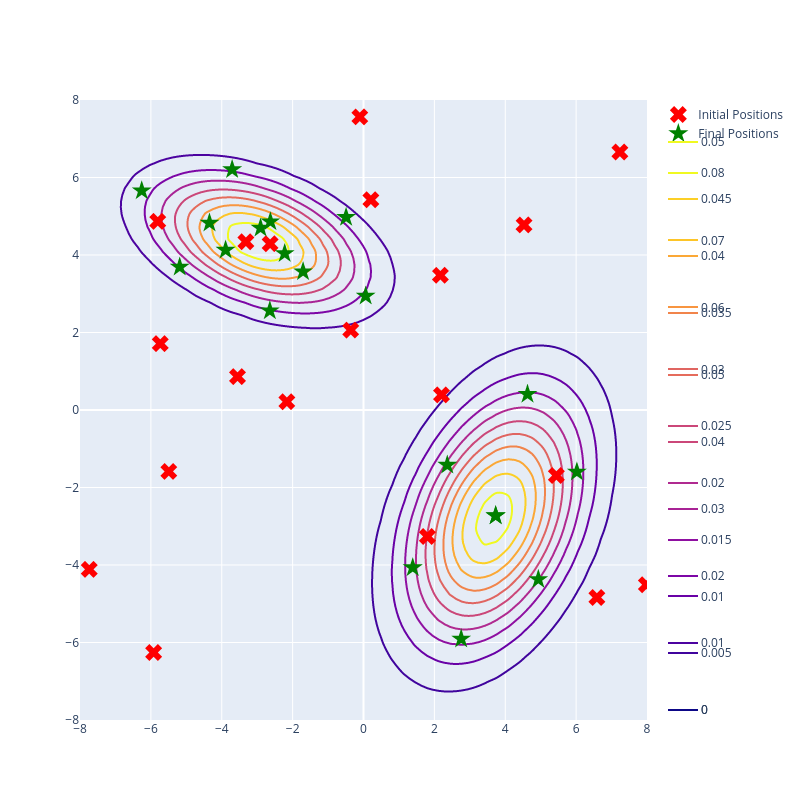

In [3]:
# Run the executable
captured_output = subprocess.run("./gmm_example", text=True, capture_output=True)

# Process the captured output
split_output_str =  captured_output.stdout.split("\n")

# Extract the particle positions
initial_positions_x = [float(elem) for elem in split_output_str[1].split(" ") if elem != ""]
initial_positions_y = [float(elem) for elem in split_output_str[2].split(" ") if elem != ""]
initial_positions = list(zip(initial_positions_x, initial_positions_y))

final_positions_x = [float(elem) for elem in split_output_str[4].split(" ") if elem != ""]
final_positions_y = [float(elem) for elem in split_output_str[5].split(" ") if elem != ""]
final_positions = list(zip(final_positions_x, final_positions_y))

print("Initial particle positions:\n", np.asarray(initial_positions))
print("Final particle positions:\n", np.asarray(final_positions))

# Plot the positions on top of the MVN
fig.add_traces(
    [
        go.Scatter(
            x=initial_positions_x,
            y=initial_positions_y,
            mode="markers",
            marker_symbol="x",
            marker_size=15,
            marker_color="red",
            name="Initial Positions"
        ),
        go.Scatter(
            x=final_positions_x,
            y=final_positions_y,
            mode="markers",
            marker_symbol="star",
            marker_size=15,
            marker_color="green",
            name="Final Positions"
        )
    ]
)

fig.update_xaxes(range=[min(x), max(x)])
fig.update_yaxes(range=[min(y), max(y)])

fig.show()